In [13]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import string 
string.punctuation
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as pltn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [14]:
df = pd.read_csv("D:/Nanang Punya/Kuliah/h/data/sms_spam_indo.csv")
df.head()

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...


# *Exploratory Data and Data Cleansing*

### Gambaran umum dataset

In [15]:
print("Jumlah baris dan kolom:")
print(df.shape)

Jumlah baris dan kolom:
(1143, 2)


### Labelling Kategori

In [16]:
# Memetakan label untuk kolom 'kategori'
df['label'] = df['Kategori'].map({'spam': 0, 'ham': 1})

# Menampilkan beberapa baris teratas setelah pelabelan
print(df.head())

  Kategori                                              Pesan  label
0     spam  Plg Yth: Simcard anda mendptkan bonus poin plu...      0
1      ham    Iya ih ko sedih sih gtau kapan lg ke bandung :(      1
2      ham  Kalau mau bikin model/controller mending per a...      1
3      ham  Selamat nama1. Semoga selalu menempuh hidup ya...      1
4     spam  Tingkatkan nilai isi ulang Anda selanjutnya mi...      0


### Visualisasi Persebaran Kategori "Spam" dan "Ham"

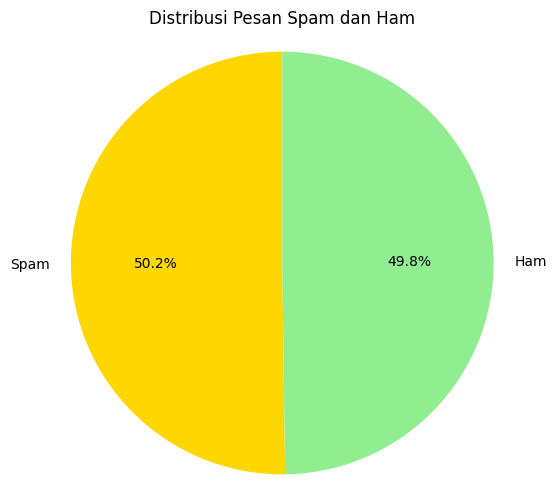

In [17]:
# Menghitung jumlah pesan spam dan ham
spam_count = df[df['label'] == 0].shape[0]
ham_count = df[df['label'] == 1].shape[0]

# Pie Chart
plt.figure(figsize=(6, 6))
labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['gold', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Pesan Spam dan Ham')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

In [18]:
# Menghitung jumlah pesan spam dan ham
spam_count = df[df['label'] == 0].shape[0]
ham_count = df[df['label'] == 1].shape[0]

# Menampilkan jumlah pesan spam dan ham
print(f"Jumlah Spam: {spam_count}")
print(f"Jumlah Ham: {ham_count}")

Jumlah Spam: 574
Jumlah Ham: 569


### Missing Value 

In [19]:
df.isnull().sum()

Kategori    0
Pesan       0
label       0
dtype: int64

### Duplikasi Data

In [20]:
df.duplicated().sum()
print(f"jumlah data yang terduplikat: {df.duplicated().sum()}")

jumlah data yang terduplikat: 1


In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Statistic Deskriptif Information of Dataset

In [22]:
df.describe()

,label
count,1142.000000
mean,0.497373
std,0.500212
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Word Count

In [23]:
from collections import Counter

def count_word_occurrences(Pesan):
    word_counts = Counter(Pesan)
    return word_counts

# Menggabungkan semua kata dalam kolom 'Pesan'
all_words = ' '.join(df['Pesan']).split()

# Menghitung kemunculan setiap kata
word_occurrences = count_word_occurrences(all_words)

# Menampilkan kemunculan tiap kata
for word, count in word_occurrences.items():
    print(f"{word}: {count}")

Plg: 7
Yth:: 3
Simcard: 7
anda: 126
mendptkan: 5
bonus: 14
poin: 10
plus-plus: 4
555: 1
dr:PT.INDOSAT: 1
pin: 29
anda:277fg49: 1
u/info: 15
klik: 41
di: 353
www.indosat-555.blogspot.com: 1
atau: 61
Hub:021-3338-0074.: 1
Iya: 11
ih: 5
ko: 3
sedih: 1
sih: 11
gtau: 2
kapan: 7
lg: 23
ke: 198
bandung: 4
:(: 19
Kalau: 14
mau: 79
bikin: 3
model/controller: 1
mending: 3
per: 1
apa: 18
y?: 1
Selamat: 39
nama1.: 2
Semoga: 3
selalu: 6
menempuh: 1
hidup: 3
yang: 79
bahagia: 1
dan: 118
menyenangkan: 1
Tingkatkan: 2
nilai: 10
isi: 55
ulang: 43
Anda: 131
selanjutnya: 2
minimal: 2
Rp10ribu: 1
untuk: 63
bisa: 57
mendapatkan: 26
Paket: 42
MURAH: 2
PAS: 2
*100*999#.: 1
Info: 65
188.: 1
Uangnya: 3
Trnsfer: 2
BNI: 10
ini: 105
aja: 69
a/n: 12
RASTINA: 1
NO.REK.0253: 1
7915: 1
37.Klo: 1
sdh: 17
d: 7
Sms: 4
no: 43
085293355598: 1
Trmks.: 1
PESAN: 18
RESMI: 31
NO: 11
M-dptkam: 1
hadiah: 61
cek.Rp.35juta: 1
dr: 51
TRI: 24
CARE: 18
pin:7Y7R8K9Z: 1
info: 28
keik:: 1
www.id-tricare2016.blogspot.com: 1
Sy: 5
RUDI: 

# *NLTK Preprocessing*

### Case Folding

In [24]:
### Case Folding
# Mengonversi huruf besar menjadi huruf kecil
df['Pesan'] = df['Pesan'].str.lower()
df

,Kategori,Pesan,label
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1
2,ham,kalau mau bikin model/controller mending per a...,1
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0
...,...,...,...
1138,ham,yg ragu sm bulet/datar atau yg pgn ikutan deba...,1
1139,ham,"semangat yang ibu gita, ibu putri dan bapak ad...",1
1140,ham,"nama1, minta database kamu sama view dan contr...",1
1141,spam,dapatkan gratis 1 cappuccino (hot/ice) & freza...,0


### Remove Punctuation atau menghilangkan tanda baca

In [25]:
# Function to remove punctuations.
def remove_punc(Pesan):
    nonP_text = "".join([char for char in Pesan if char not in string.punctuation])
    return nonP_text

df["body_text_clean"] = df["Pesan"].apply(lambda x: remove_punc(x))

df.head()

,Kategori,Pesan,label,body_text_clean
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...


### Tokenized

In [26]:
#function to apply tokenization
def tokenize(Pesan):
    tokens = re.split("\W+", Pesan)# W+ means all capital, small alphabets and integers 0-9
    return tokens
df["body_text_tokenized"] = df["body_text_clean"].apply(lambda x: tokenize(x))
df.head()

,Kategori,Pesan,label,body_text_clean,body_text_tokenized
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po..."
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,..."
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ..."
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid..."
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut..."


### Stopwords

In [27]:
# Menghapus stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokenized_text):
    clean_text = [word for word in tokenized_text if word.lower() not in stop_words]
    return clean_text

df["body_text_nostop"] = df["body_text_tokenized"].apply(lambda x: remove_stopwords(x))

df.head()

,Kategori,Pesan,label,body_text_clean,body_text_tokenized,body_text_nostop
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[plg, yth, simcard, mendptkan, bonus, poin, pl..."
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]"
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[bikin, modelcontroller, mending, y]"
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid...","[selamat, nama1, semoga, menempuh, hidup, baha..."
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rp10r..."


### Lemmatizer

In [28]:
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

df["body_text_lemmatized"] = df["body_text_nostop"].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Redmi_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Kategori,Pesan,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[plg, yth, simcard, mendptkan, bonus, poin, pl...","[plg, yth, simcard, mendptkan, bonus, poin, pl..."
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]"
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[bikin, modelcontroller, mending, y]","[bikin, modelcontroller, mending, y]"
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid...","[selamat, nama1, semoga, menempuh, hidup, baha...","[selamat, nama1, semoga, menempuh, hidup, baha..."
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...","[tingkatkan, nilai, isi, ulang, minimal, rp10r..."


In [29]:
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

# Menggabungkan kata-kata dalam kolom 'body_text_lemmatized' tanpa pemisah
df["Pesan_lemmatized"] = df["body_text_lemmatized"].apply(lambda x: ' '.join(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Redmi_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Kategori,Pesan,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized,Pesan_lemmatized
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[plg, yth, simcard, mendptkan, bonus, poin, pl...","[plg, yth, simcard, mendptkan, bonus, poin, pl...",plg yth simcard mendptkan bonus poin plusplus ...
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]",iya ih ko sedih sih gtau lg bandung
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[bikin, modelcontroller, mending, y]","[bikin, modelcontroller, mending, y]",bikin modelcontroller mending y
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid...","[selamat, nama1, semoga, menempuh, hidup, baha...","[selamat, nama1, semoga, menempuh, hidup, baha...",selamat nama1 semoga menempuh hidup bahagia me...
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...",tingkatkan nilai isi ulang minimal rp10ribu pa...


In [30]:
# Normalisasi kata menjadi kata baku sebelum lemmatization
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def normalize_text(text):
    return stemmer.stem(text)

df['Pesan_normalized'] = df['Pesan_lemmatized'].apply(lambda x: ' '.join([normalize_text(word) for word in x]))
df.head()

,Kategori,Pesan,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized,Pesan_lemmatized,Pesan_normalized
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[plg, yth, simcard, mendptkan, bonus, poin, pl...","[plg, yth, simcard, mendptkan, bonus, poin, pl...",plg yth simcard mendptkan bonus poin plusplus ...,p l g y t h s i m c a r d m e n d p t k a n...
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]",iya ih ko sedih sih gtau lg bandung,i y a i h k o s e d i h s i h g t a u l ...
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[bikin, modelcontroller, mending, y]","[bikin, modelcontroller, mending, y]",bikin modelcontroller mending y,b i k i n m o d e l c o n t r o l l e r m e ...
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid...","[selamat, nama1, semoga, menempuh, hidup, baha...","[selamat, nama1, semoga, menempuh, hidup, baha...",selamat nama1 semoga menempuh hidup bahagia me...,s e l a m a t n a m a 1 s e m o g a m e n e...
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...",tingkatkan nilai isi ulang minimal rp10ribu pa...,t i n g k a t k a n n i l a i i s i u l a n...


# *Feature Extraction*

### Bag of Words

In [31]:
# Membuat objek CountVectorizer
count_vectorizer = CountVectorizer()

# Melakukan fit transform pada data teks
X_counts = count_vectorizer.fit_transform(df['Pesan_lemmatized'])
X_counts = X_counts.toarray()
X_counts.shape
feature_names = count_vectorizer.get_feature_names_out()
print(feature_names)


['0000' '00001200' '0006' ... 'zalora' 'zarkasi' 'zona']


In [32]:
X_counts.shape

(1142, 4937)

### TF-IDF Vectorizer

In [33]:
# Membuat objek TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Melakukan transformasi tf-idf pada data teks
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf = X_tfidf.toarray()
X_tfidf.shape

(1142, 4937)

In [34]:
feature = tfidf_transformer.get_feature_names_out()
print(feature)

['x0' 'x1' 'x2' ... 'x4934' 'x4935' 'x4936']


### Text Length Message Cleaned

In [35]:
# Create feature for text message length
df['text_length'] = df['Pesan_lemmatized'].apply(lambda x: len(x))

# Create feature for % of punctuation in text
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

df['punctuation_percentage'] = df['Pesan_lemmatized'].apply(lambda x: count_punctuation(x))
df.head()

,Kategori,Pesan,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized,Pesan_lemmatized,Pesan_normalized,text_length,punctuation_percentage
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,0,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[plg, yth, simcard, mendptkan, bonus, poin, pl...","[plg, yth, simcard, mendptkan, bonus, poin, pl...",plg yth simcard mendptkan bonus poin plusplus ...,p l g y t h s i m c a r d m e n d p t k a n...,128,0.0
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,1,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]","[iya, ih, ko, sedih, sih, gtau, lg, bandung, ]",iya ih ko sedih sih gtau lg bandung,i y a i h k o s e d i h s i h g t a u l ...,36,0.0
2,ham,kalau mau bikin model/controller mending per a...,1,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[bikin, modelcontroller, mending, y]","[bikin, modelcontroller, mending, y]",bikin modelcontroller mending y,b i k i n m o d e l c o n t r o l l e r m e ...,31,0.0
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,1,selamat nama1 semoga selalu menempuh hidup yan...,"[selamat, nama1, semoga, selalu, menempuh, hid...","[selamat, nama1, semoga, menempuh, hidup, baha...","[selamat, nama1, semoga, menempuh, hidup, baha...",selamat nama1 semoga menempuh hidup bahagia me...,s e l a m a t n a m a 1 s e m o g a m e n e...,56,0.0
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,0,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...","[tingkatkan, nilai, isi, ulang, minimal, rp10r...",tingkatkan nilai isi ulang minimal rp10ribu pa...,t i n g k a t k a n n i l a i i s i u l a n...,74,0.0


### Visualisasi Distribusi Pesan Spam dan Ham Berdasarkan Panjang Pesan Bersih 

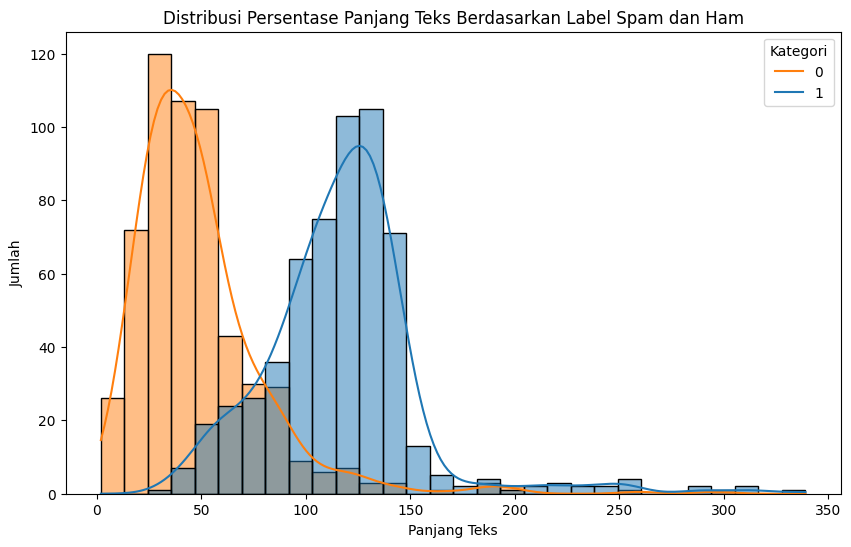

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Distribusi Persentase Panjang Teks Berdasarkan Label Spam dan Ham')
plt.xlabel('Panjang Teks')
plt.ylabel('Jumlah')
plt.legend(title='Kategori', labels=['0', '1'])
plt.show()

# *Modelling*

### Split Data

In [37]:
# Memisahkan fitur dan label
X = df[['Pesan_lemmatized', 'text_length']]
y = df['label']

# Membagi data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applied Naive Bayes Classifier

In [38]:
# Membuat pipeline dengan TF-IDF Vectorizer dan Naive Bayes Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(smooth_idf=True)),
    ('clf', MultinomialNB())
])

# Melatih model menggunakan data latih
pipeline.fit(X_train['Pesan_lemmatized'], y_train)

# Memprediksi label untuk data uji
predictions = pipeline.predict(X_test['Pesan_lemmatized'])

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi model untuk Pesan: {accuracy}")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi untuk Pesan:")
print(classification_report(y_test, predictions))

Akurasi model untuk Pesan: 0.9781659388646288
Laporan Klasifikasi untuk Pesan:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       119
           1       0.98      0.97      0.98       110

    accuracy                           0.98       229
   macro avg       0.98      0.98      0.98       229
weighted avg       0.98      0.98      0.98       229



### Confussion Matriks

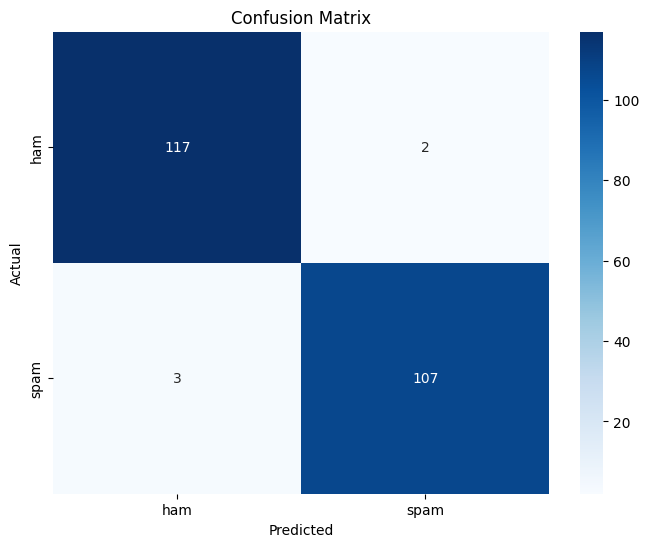

In [39]:
# Memprediksi label untuk data uji
predictions = pipeline.predict(X_test['Pesan_lemmatized'])

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# *Testing Detection*

### Testing ham detection

In [40]:
# Contoh pesan baru yang ingin diprediksi
new_message = "Halo Nanang selamat malam jangan lupaa revisiannya ya hahahaha"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")

Pesan tersebut terdeteksi sebagai HAM.


In [41]:
new_message = "Halo Nanang selamat malam jangan lupaa revisiannya ya hahahaha"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total keseluruhan korpus {total_documents}")

Pesan tersebut terdeteksi sebagai HAM.
Frekuensi kata dalam dokumen:
Halo: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
Nanang: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
selamat: Muncul sebanyak 68 kali dari total keseluruhan korpus 1142
malam: Muncul sebanyak 8 kali dari total keseluruhan korpus 1142
jangan: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
lupaa: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
revisiannya: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
ya: Muncul sebanyak 81 kali dari total keseluruhan korpus 1142
hahahaha: Muncul sebanyak 1 kali dari total keseluruhan korpus 1142


In [42]:
new_message = "Halo Nanang selamat malam jangan lupaa revisiannya ya hahahaha"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df[df['label'] == 1]['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
total_documents = len(df[df['label'] == 1])
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total dokumen ham {total_documents}")

Pesan tersebut terdeteksi sebagai HAM.
Frekuensi kata dalam dokumen:
Halo: Muncul sebanyak 0 kali dari total dokumen ham 568
Nanang: Muncul sebanyak 0 kali dari total dokumen ham 568
selamat: Muncul sebanyak 8 kali dari total dokumen ham 568
malam: Muncul sebanyak 3 kali dari total dokumen ham 568
jangan: Muncul sebanyak 0 kali dari total dokumen ham 568
lupaa: Muncul sebanyak 0 kali dari total dokumen ham 568
revisiannya: Muncul sebanyak 0 kali dari total dokumen ham 568
ya: Muncul sebanyak 66 kali dari total dokumen ham 568
hahahaha: Muncul sebanyak 1 kali dari total dokumen ham 568


In [43]:
new_message = "Halo Nanang selamat malam jangan lupaa revisiannya ya hahahaha"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df[df['label'] == 0]['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
total_documents = len(df[df['label'] == 0])
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total dokumen spam {total_documents}")

Pesan tersebut terdeteksi sebagai HAM.
Frekuensi kata dalam dokumen:
Halo: Muncul sebanyak 0 kali dari total dokumen spam 574
Nanang: Muncul sebanyak 0 kali dari total dokumen spam 574
selamat: Muncul sebanyak 60 kali dari total dokumen spam 574
malam: Muncul sebanyak 5 kali dari total dokumen spam 574
jangan: Muncul sebanyak 0 kali dari total dokumen spam 574
lupaa: Muncul sebanyak 0 kali dari total dokumen spam 574
revisiannya: Muncul sebanyak 0 kali dari total dokumen spam 574
ya: Muncul sebanyak 15 kali dari total dokumen spam 574
hahahaha: Muncul sebanyak 0 kali dari total dokumen spam 574


### Testing spam detection

In [44]:
# Contoh pesan baru yang ingin diprediksi
new_message = "Anda menerima email ini karena Anda memiliki interaksi baru"


# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")

Pesan tersebut terdeteksi sebagai SPAM.


In [45]:
new_message = "Anda menerima email ini karena Anda memiliki interaksi baru"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total keseluruhan korpus {total_documents}")

Pesan tersebut terdeteksi sebagai SPAM.
Frekuensi kata dalam dokumen:
Anda: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
menerima: Muncul sebanyak 3 kali dari total keseluruhan korpus 1142
email: Muncul sebanyak 7 kali dari total keseluruhan korpus 1142
ini: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
karena: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
memiliki: Muncul sebanyak 2 kali dari total keseluruhan korpus 1142
interaksi: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142
baru: Muncul sebanyak 0 kali dari total keseluruhan korpus 1142


In [46]:
new_message = "Anda menerima email ini karena Anda memiliki interaksi baru"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df[df['label'] == 1]['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
total_documents = len(df[df['label'] == 1])
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total dokumen ham {total_documents}")

Pesan tersebut terdeteksi sebagai SPAM.
Frekuensi kata dalam dokumen:
Anda: Muncul sebanyak 0 kali dari total dokumen ham 568
menerima: Muncul sebanyak 0 kali dari total dokumen ham 568
email: Muncul sebanyak 6 kali dari total dokumen ham 568
ini: Muncul sebanyak 0 kali dari total dokumen ham 568
karena: Muncul sebanyak 0 kali dari total dokumen ham 568
memiliki: Muncul sebanyak 0 kali dari total dokumen ham 568
interaksi: Muncul sebanyak 0 kali dari total dokumen ham 568
baru: Muncul sebanyak 0 kali dari total dokumen ham 568


In [47]:
new_message = "Anda menerima email ini karena Anda memiliki interaksi baru"

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menghitung frekuensi kata dalam dokumen yang diinputkan
word_freq_in_message = count_word_occurrences(new_message.split())

# Menghitung frekuensi kata dalam dokumen dari dataset asli
word_freq_in_corpus = count_word_occurrences(' '.join(df[df['label'] == 0]['Pesan_lemmatized']).split())

# Menampilkan hasil prediksi dan frekuensi kata dalam dokumen
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")
print("Frekuensi kata dalam dokumen:")
total_documents = len(df)
total_documents = len(df[df['label'] == 0])
for word, count in word_freq_in_message.items():
    total_count = word_freq_in_corpus.get(word, 0)
    print(f"{word}: Muncul sebanyak {total_count} kali dari total dokumen spam {total_documents}")

Pesan tersebut terdeteksi sebagai SPAM.
Frekuensi kata dalam dokumen:
Anda: Muncul sebanyak 0 kali dari total dokumen spam 574
menerima: Muncul sebanyak 3 kali dari total dokumen spam 574
email: Muncul sebanyak 1 kali dari total dokumen spam 574
ini: Muncul sebanyak 0 kali dari total dokumen spam 574
karena: Muncul sebanyak 0 kali dari total dokumen spam 574
memiliki: Muncul sebanyak 2 kali dari total dokumen spam 574
interaksi: Muncul sebanyak 0 kali dari total dokumen spam 574
baru: Muncul sebanyak 0 kali dari total dokumen spam 574


# *Testing Detection berdasarkan jumlah karakter/kata * 

### Testing spam detection

In [51]:
# Contoh pesan baru yang ingin diprediksi
new_message = "Selamat! Anda telah memenangkan hadiah uang tunai sebesar $1.000.000! Untuk mengklaim hadiah Anda, silakan kirimkan informasi pribadi Anda termasuk nama lengkap, alamat, nomor telepon, dan nomor rekening bank ke alamat email ini segera. Jangan lewatkan kesempatan ini untuk mendapatkan uang mudah tanpa usaha. Segera kirimkan data Anda untuk menerima hadiah besar ini sebelum waktu habis. Ingat, ini adalah kesempatan langka dan Anda adalah pemenang yang terpilih secara acak. Segera hubungi kami untuk proses lebih lanjut dan jangan lupa untuk memberitahukan teman-teman Anda tentang peluang luar biasa ini!"

# Fungsi untuk menghitung jumlah karakter dan kata
def count_characters_and_words(message):
    num_characters = len(message)
    num_words = len(message.split())
    return num_characters, num_words

# Menghitung jumlah karakter dan kata pada pesan baru
characters, words = count_characters_and_words(new_message)
print(f"Jumlah Karakter: {characters}, Jumlah Kata: {words}")

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")

Jumlah Karakter: 608, Jumlah Kata: 87
Pesan tersebut terdeteksi sebagai SPAM.


### Testing ham detection

In [52]:
# Contoh pesan baru yang ingin diprediksi
new_message = "Selamat pagi, saya ingin memberitahukan Anda bahwa rapat yang dijadwalkan untuk hari ini pukul 10:00 telah dijadwalkan ulang menjadi pukul 14:00. Harap diperhatikan dan sesuaikan jadwal Anda. Kami akan membahas beberapa topik penting mengenai proyek terbaru, jadi pastikan untuk membawa semua dokumen yang diperlukan. Jika ada perubahan lebih lanjut atau jika Anda tidak dapat hadir pada waktu yang baru, silakan hubungi saya secepatnya. Terima kasih atas pengertian dan kerjasamanya. Semoga hari Anda menyenangkan dan produktif!"

# Fungsi untuk menghitung jumlah karakter dan kata
def count_characters_and_words(message):
    num_characters = len(message)
    num_words = len(message.split())
    return num_characters, num_words

# Menghitung jumlah karakter dan kata pada pesan baru
characters, words = count_characters_and_words(new_message)
print(f"Jumlah Karakter: {characters}, Jumlah Kata: {words}")

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = pipeline.predict([new_message])

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print("Pesan tersebut terdeteksi sebagai SPAM.")
else:
    print("Pesan tersebut terdeteksi sebagai HAM.")

Jumlah Karakter: 529, Jumlah Kata: 75
Pesan tersebut terdeteksi sebagai HAM.
